<a href="https://colab.research.google.com/github/eacle00/data_science_practice/blob/main/COVID_19_in_PH_Daily_Case_Forecasting(Stacked_Bidirectional_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import ConvLSTM2D

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Apr_9_Report_datetime.csv to Apr_9_Report_datetime.csv


In [4]:
import io
data = io.BytesIO(uploaded['Apr_9_Report_datetime.csv'])

In [5]:
covid = pd.read_csv(data)
pd.set_option('display.max_rows',None)

In [6]:
covid['date'] = pd.to_datetime(covid['date'])

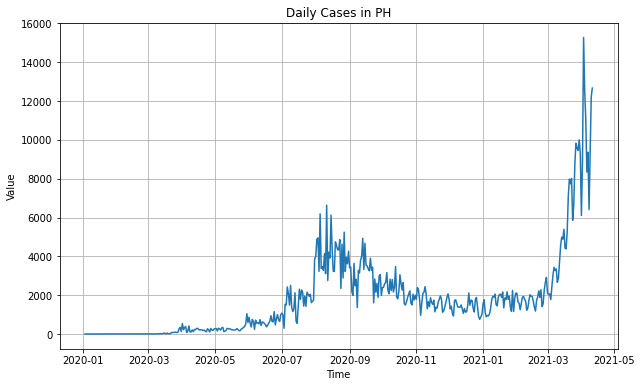

In [7]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date',y='daily_cases',data=covid)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Daily Cases in PH')
plt.grid(True)

In [8]:
covid_ph = covid.drop(covid.index[:147],axis=0)

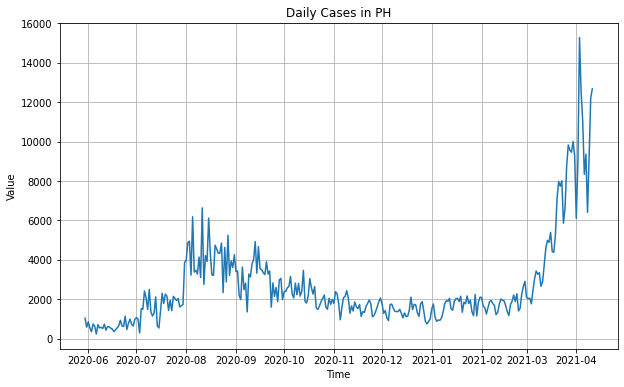

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date',y='daily_cases',data=covid_ph)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Daily Cases in PH')
plt.grid(True)

In [10]:
covid_ph.shape
covid_ph.set_index('date',inplace=True)

In [11]:
def prepare_data(timeseries_data, n_steps):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    #find the end of the data
    end_ix = i + n_steps
    #check if we are beyond the sequence
    if end_ix > len(timeseries_data)-1:
      break
    #gather input and output
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X),np.array(y)

In [12]:
values = covid_ph['daily_cases'].values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)

In [13]:
timeseries_data = normalized.tolist()
n_steps=3
X,y = prepare_data(timeseries_data, n_steps)

In [14]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [15]:
model = Sequential()
model.add(Bidirectional(LSTM(75, activation='relu',return_sequences=True),input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(50, activation = 'relu',return_sequences=True)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
#fit model
history = model.fit(X,y, epochs=350, verbose=1)

Epoch 1/350
10/10 [==============================] - 6s 13ms/step - loss: 0.0444 - accuracy: 8.9470e-04
Epoch 2/350
10/10 [==============================] - 0s 12ms/step - loss: 0.0334 - accuracy: 0.0012
Epoch 3/350
10/10 [==============================] - 0s 12ms/step - loss: 0.0271 - accuracy: 0.0012
Epoch 4/350
10/10 [==============================] - 0s 13ms/step - loss: 0.0143 - accuracy: 0.0086
Epoch 5/350
10/10 [==============================] - 0s 12ms/step - loss: 0.0153 - accuracy: 0.0086
Epoch 6/350
10/10 [==============================] - 0s 12ms/step - loss: 0.0086 - accuracy: 0.0027
Epoch 7/350
10/10 [==============================] - 0s 12ms/step - loss: 0.0052 - accuracy: 0.0034
Epoch 8/350
10/10 [==============================] - 0s 13ms/step - loss: 0.0047 - accuracy: 0.0107
Epoch 9/350
10/10 [==============================] - 0s 12ms/step - loss: 0.0048 - accuracy: 8.9470e-04
Epoch 10/350
10/10 [==============================] - 0s 12ms/step - loss: 0.0052 - accuracy

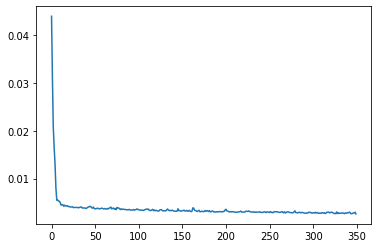

In [16]:
loss = history.history['loss']
epochs = range(len(history.history['loss']))
plt.plot(epochs, loss, label = 'Training Loss')
plt.show()

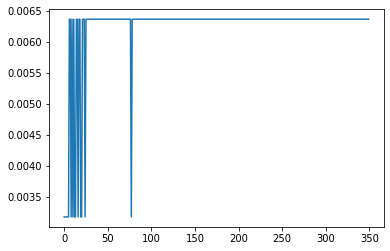

In [17]:
acc = history.history['accuracy']
epochs = range(len(history.history['loss']))
plt.plot(epochs, acc, label = 'Training Loss')
plt.show()

In [18]:
timeseries_data = normalized.tolist()
n_steps=3
X,y = prepare_data(timeseries_data, n_steps)
n_features = 1
a = model.predict(X, verbose=0)
a.tolist()
a = scaler.inverse_transform(a)

In [19]:
covid_ph.reset_index(inplace=True)

In [21]:
q = list(range(len(covid_ph['daily_cases'][3:])))
w = covid_ph['daily_cases'][3:].tolist()

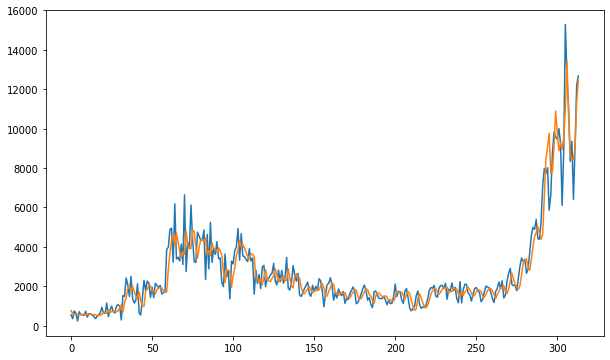

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(q, w, label = 'Actual')
plt.plot(q, a, label = 'Predicted')
plt.show()

In [24]:
lst = []
for i in range(len(X[X.shape[0]-1].tolist())):
  e = X[X.shape[0]-1].tolist()[i][0]
  lst.append(e)
x_input = np.array(lst)
temp_input = lst
lst_output = []
x_input = x_input.reshape((1,n_steps,n_features))
yhat = model.predict(x_input, verbose = 0)
yhat = scaler.inverse_transform(yhat.tolist())
yhat = round(yhat.tolist()[0][0])
print("April 12 Covid-19 Daily Forecast is {} cases.".format(yhat))

April 12 Covid-19 Daily Forecast is 12454 cases.
